**ASSIGNMENT 2 - Classification Empirical Study: Naïve Bayes vs Logistic Regression**

--------------------------------------------------------------------------

**1. Group Description**

Group Number: 10

Member Name 1: Xiaoxuan Wang

Member Student Number 1: 300133594

Member Name 2: Victor Li

Member Student Number 2: 300146133

--------------------------------------------------------------------------

**Import Libraries**

In [2]:
import pandas
import numpy
import itertools

--------------------------------------------------------------------------

**2. Dataset**

Chosen dataset: Car dataset

The dataset is coming from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/).
It can be retrieved by following [this link](https://archive.ics.uci.edu/dataset/19/car+evaluation).

**Read Dataset**

In [3]:
url = "https://raw.githubusercontent.com/uOttawa-Collabs/CSI4106-Fall-2023/master/Assignment%202/Car/car.data"
dataframe = pandas.read_csv(url)
dataframe.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
dataframe

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


**3. Familiarize with the classification task and the dataset**

***Objective***

The objective of this study is to develop a classification model to evaluate cars based on their configurations and parameters. The dataset comprises six discrete (categorical) feature variables: buying price, maintenance price, number of doors, capacity in terms of persons, the size of the luggage boot, and estimated safety of the car. The target variable is the evaluation of the car, categorized into four classes: unacceptable, acceptable, good, and very good.

***Applications***

1. May assist customers to make informed decisions based on their preferences and constraints, offering valuable insights.
2. May assist car dealership to help assist potential buyers in finding cars that align with their requirements, thereby enhancing customer satisfaction and loyalty.

***Dataset Characteristics Analysis***

****Features****

The dataset used for this study contains information on the following six feature variables:
* Buying Price (`buying`): Indicates the price range at which the car was purchased.
    * Possible values: `vhigh`, `high`, `med`, `low`.
* Maintenance Price (`maint`): Represents the maintenance cost of the car.
    * Possible values: `vhigh`, `high`, `med`, `low`.
* Number of Doors (`doors`): Denotes the number of doors the car has.
    * Possible values: `2`, `3`, `4`, `5more`.
* Capacity (`persons`): Indicates the maximum number of persons the car can accommodate.
    * Possible values: `2`, `4`, `more`.
* Luggage Boot Size (`lug_boot`): Represents the size of the luggage boot in the car.
    * Possible values: `small`, `med`, `big`.
* Estimated Safety (`safety`): Provides an estimation of the safety level of the car.
    * Possible values: `low`, `med`, `high`.

****Classes****

The target variable is Car Evaluation (`class`), which classifies cars into four categories:
unacceptable (`unacc`), acceptable (`acc`), good (`good`), and very good (`vgood`).
These classes serve as the basis for evaluating the overall desirability of a car.

****Training Examples****

The dataset contains 1728 training samples in total. No samples have missing data.

--------------------------------------------------------------------------

**4. Brainstorm about the attributes**

In the sale market of cars. There are more factors that are able to influence the sale. Except as **provided attributes**, **second-hand price**, **power**, **brand**, **color**, and **after-sale service** are essential as well. Among the provided attributes, I think the Number of Doors data is the least useful information since there is a correlation between the Capacity and the Number of Doors. For example in common situations, if the capacity is 2, the number of doors is at least 2, while the capacity is 4, the number of doors is often 4 and at least 2. The larger a car's capacity, the more doors it may have. Although it is possible that rare door numbers such as odd numbers can provide some surprises to the customers, I don't think there are certain people who would like to purchase cars based on the number of doors.

Based on the diagrams below, it is clear that every value of each feature is the same, which can prevent bias when training models. Since all features are distributed values (e.g. the number of persons cannot be decimals), the attribute normalization method is not suitable for this dataset.

{'low': 432, 'med': 432, 'high': 432, 'vhigh': 431}


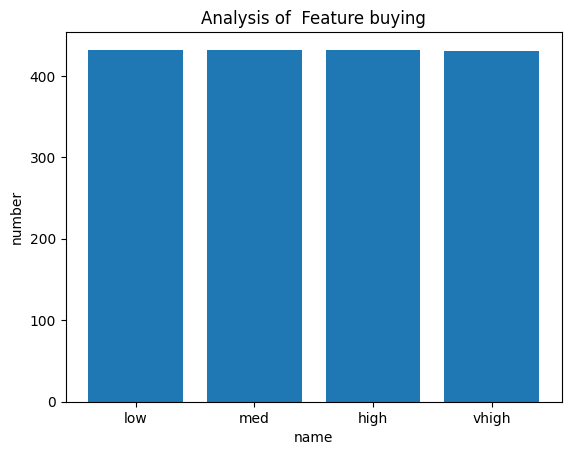

{'low': 432, 'med': 432, 'high': 432, 'vhigh': 431}


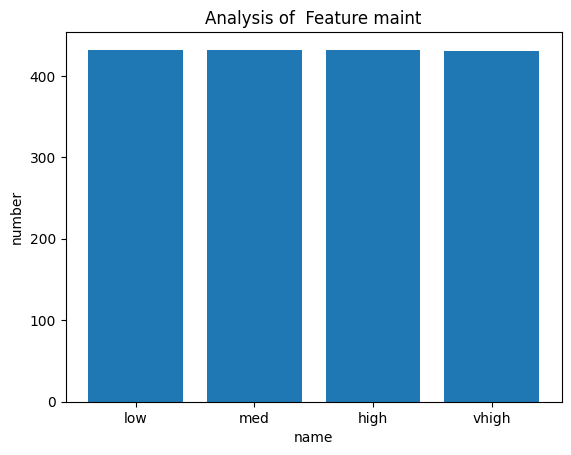

{'2': 431, '3': 432, '4': 432, '5more': 432}


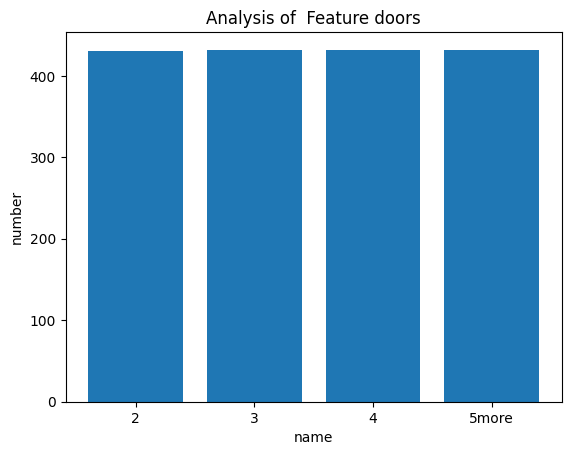

{'2': 575, '4': 576, 'more': 576}


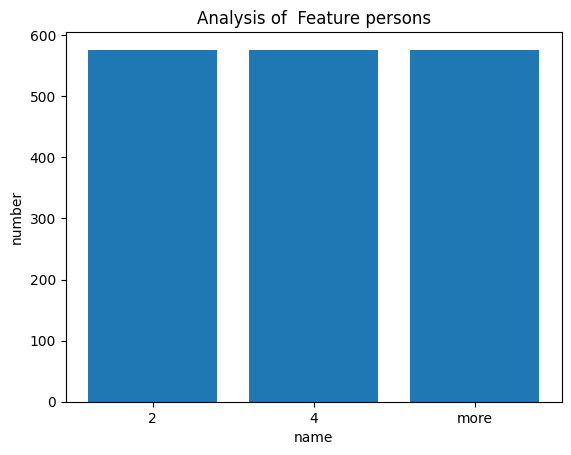

{'small': 575, 'med': 576, 'big': 576}


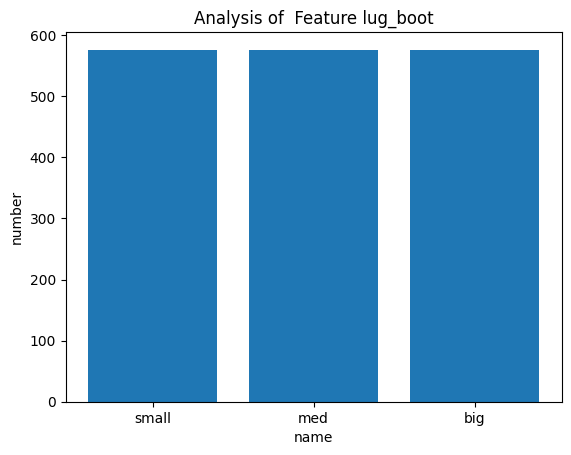

{'low': 575, 'med': 576, 'high': 576}


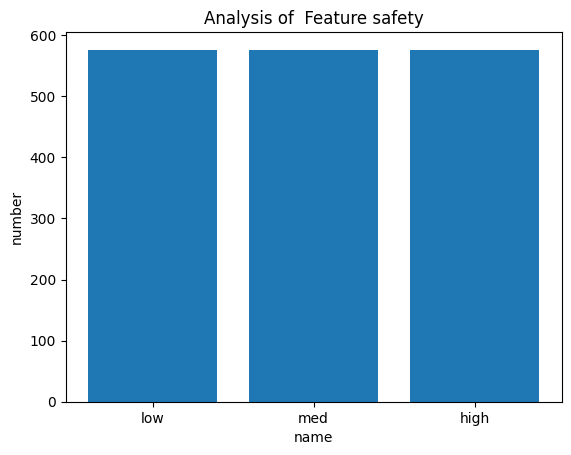

In [23]:
from matplotlib import pyplot as plot

buying_dict = {"low": 0, "med": 0, "high": 0, "vhigh": 0}
maint_dict = {"low": 0, "med": 0, "high": 0, "vhigh": 0}
door_dict = {"2": 0, "3": 0, "4": 0, "5more": 0}
persons_dict = {"2": 0, "4": 0, "more": 0}
lug_dict = {"small": 0, "med": 0, "big": 0}
safety_dict = {"low": 0, "med": 0, "high": 0}

def analyze_data(dataframe, prop, dic):
    data = dataframe[prop]
    for row in data:
        dic[row] += 1
    generate_diagram(dic, prop)

def generate_diagram(dic: dict, name):
    print(dic)
    x_list = []
    y_list = []
    for i in dic.keys():
        x_list.append(i)
        y_list.append(dic[i])
    plot.bar(x_list, y_list)
    plot.title("Analysis of " + " Feature " + name)
    plot.xlabel("name")
    plot.ylabel("number")
    plot.show()


analyze_data(dataframe, "buying", buying_dict)
analyze_data(dataframe, "maint", maint_dict)
analyze_data(dataframe, "doors", door_dict)
analyze_data(dataframe, "persons", persons_dict)
analyze_data(dataframe, "lug_boot", lug_dict)
analyze_data(dataframe, "safety", safety_dict)


--------------------------------------------------------------------------

**5. Encode the features**

* The data source that was chosen is using discrete variables for all features. It natively fits into the Categorical Naive Bayes Model (`CategoricalNB`).
* For Logistic Regression, one-hot encoding enables the conversion to continuous variables for all features.

In [3]:
# Perform one-hot encoding for the dataset
encoded_dataframe = pandas.get_dummies(
    dataframe,
    columns=["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"],
    dtype=int
)
encoded_dataframe

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med,class_acc,class_good,class_unacc,class_vgood
0,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1723,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1724,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1725,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


--------------------------------------------------------------------------

**6. Define 2 models using default parameters**


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB

naive_bayes_classifier = CategoricalNB()
logistic_regression_classifier = LogisticRegression()

--------------------------------------------------------------------------

**7. Train/test/evaluate the 2 models in cross-validation**


--------------------------------------------------------------------------

**8. Train/test/evaluate the 2 models in cross-validation with modified parameters (#1)**


--------------------------------------------------------------------------

**9. Train/test/evaluate the 2 models in cross-validation with modified parameters (#2)**


--------------------------------------------------------------------------

**10. Analyze the obtained results**


--------------------------------------------------------------------------

**11. Conclusion**


--------------------------------------------------------------------------

**12. References**

[1] M. Bohanec, 'Car Evaluation'. UCI Machine Learning Repository, 1988. doi:10.24432/C5JP48